# **Classify X-Rays With Machine Learning**


# **Objective**

- You are a researcher in a hospital lab and are given the task to develop a learning model that supports doctors with diagnosing illnesses that affect patients’ lungs. At your disposal, you have a set X-ray lung scans with examples of patients who had either pneumonia, Covid-19, or no illness. Using the Keras module, you will create a classification model that outputs a diagnosis based on a patient’s X-ray scan. You hope this model can help doctors with the challenge of deciphering X-ray scans and open a dialogue between your research team and the medical staff to create learning models that are as effective and interpretable as possible.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pranavraikokte/covid19-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 158M/158M [00:02<00:00, 82.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pranavraikokte/covid19-image-dataset/versions/2


In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Questions:

What types of images are we working with?
How are they organized? How will this affect preprocessing?
Will this be binary classification or multi-class classification?

## **Define Paths to the Dataset**


In [7]:
dataset_path = path

#Define paths to the training and test directories
train_dir = os.path.join(dataset_path, 'Covid19-dataset', 'train')
test_dir = os.path.join(dataset_path, 'Covid19-dataset', 'test')

## **Set Parameters for Image Processing**


In [8]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

## **Create Image Data Generators**


In [11]:
# For training data: apply data augmnetation and rescaling

train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2 #Use 20% of training data for validation
)

# For test data: only rescaling
test_image_generator = ImageDataGenerator(
    rescale=1./255)

## **Load Data Using Generators**


In [16]:
# Training data generator
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Test data generator
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Important for later evaluation
)

# Verify Class Indicies
print("Class Indicies:", train_data_gen.class_indices)

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Class Indicies: {'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


# **Building a Simple Convolutional Neural Network**

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3, activation='softmax') # 3 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Train the Model**

In [23]:
EPOCHS = 20

history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.3511 - loss: 2.9114 - val_accuracy: 0.5312 - val_loss: 1.0380
Epoch 2/20
1/6 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.4375 - loss: 1.0684

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.4375 - loss: 1.0684 - val_accuracy: 0.6667 - val_loss: 1.0485
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6251 - loss: 0.9946
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 693ms/step - accuracy: 0.2812 - loss: 1.1553 - val_accuracy: 0.6562 - val_loss: 0.8856
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7014 - loss: 0.7779 - val_accuracy: 0.6111 - val_loss: 0.8333
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5625 - loss: 0.7900
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.7415 - loss: 0.6007 - val_accuracy: 0.8125 - val_loss: 0.5034
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.8125 - loss: 0.3798 - val_accuracy: 0.7222 - val_loss: 0.7756
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7650 - loss: 0.5767
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 500ms/step - accuracy: 0.8125 - loss: 0.4350 - val_accuracy: 0.7500 - val_loss: 0.5856
Epoch 11/20
6

# **Evaluate the Model**

In [24]:
test_loss, test_accuracy = model.evaluate(test_data_gen, steps=test_data_gen.samples // BATCH_SIZE)
print('Test Accuracy:', test_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 804ms/step - accuracy: 0.7812 - loss: 0.4957
Test Accuracy: 0.765625


# **Analyze Model Performance**

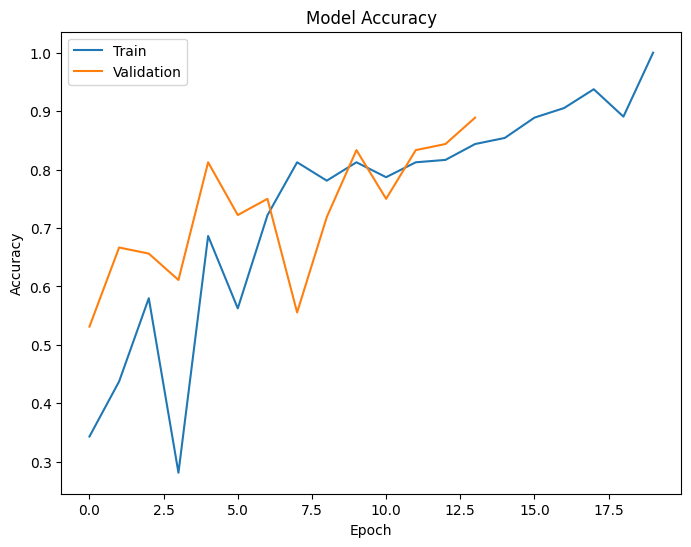

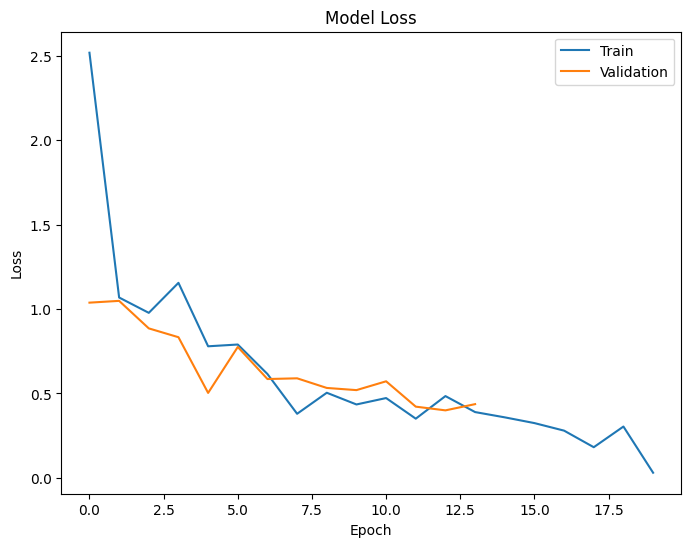

In [25]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# **Make Predictions and Generate a Classifcation Report**

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the filename, true labels, and predictions
test_data_gen.reset()

Y_Pred = model.predict(test_data_gen, steps=test_data_gen.samples // test_data_gen.batch_size + 1,
    verbose=1)

y_pred = np.argmax(Y_Pred, axis=1)

# Get true labels
y_true = test_data_gen.classes

# Class labels
class_labels = list(test_data_gen.class_indices.keys())

#Compute the Confustion Matrix
cm = confusion_matrix(y_true, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step


Overall Accuracy: 0.7727
             Class  TP  FP  FN  TN  Precision    Recall  F1-Score
0            Covid  24   0   2  40   1.000000  0.923077  0.960000
1           Normal   7   0  13  46   1.000000  0.350000  0.518519
2  Viral Pneumonia  20  15   0  31   0.571429  1.000000  0.727273


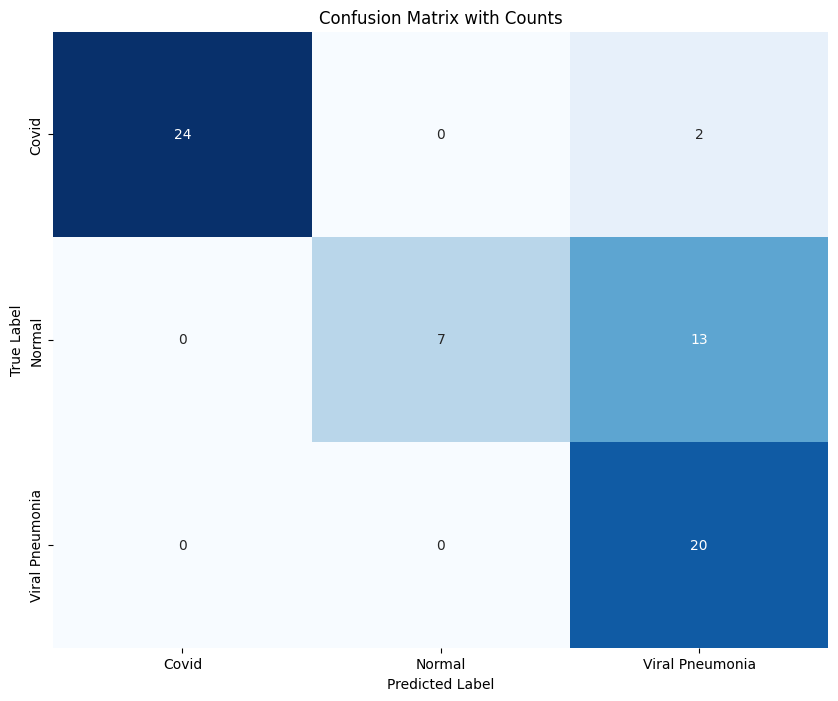

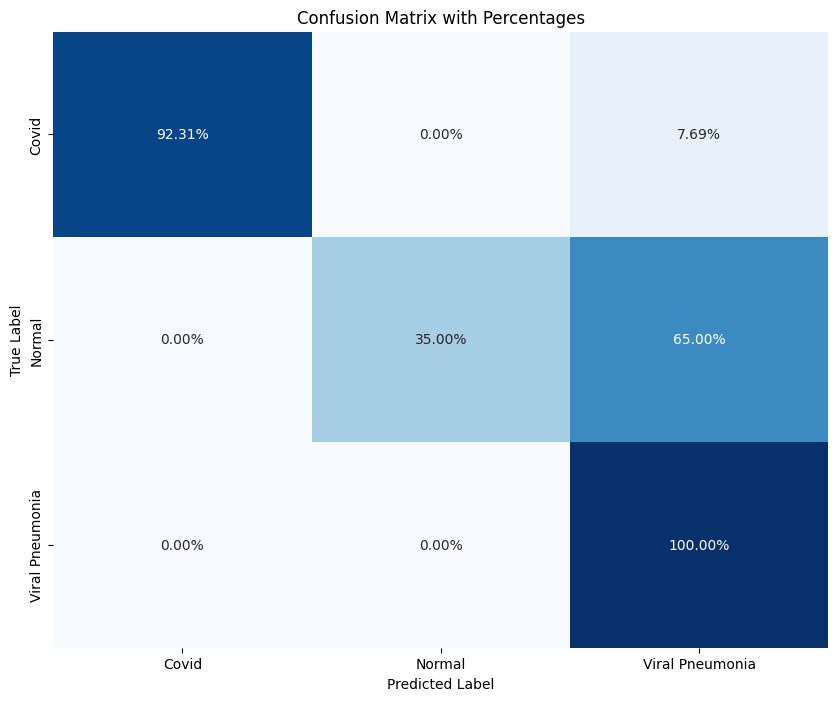

Macro-Average Precision: 0.8571
Macro-Average Recall: 0.7577
Macro-Average F1-Score: 0.7353
Weighted Precision: 0.8701
Weighted Recall: 0.7727
Weighted F1-Score: 0.7557


In [38]:
# Calculate TP, FP, FN, TN for each class
TP = []
FP = []
FN = []
TN = []

num_classes = len(class_labels)

for i in range(num_classes):
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (tp + fp + fn)
    TP.append(tp)
    FP.append(fp)
    FN.append(fn)
    TN.append(tn)

# Compute Precision, Recall, F1-Score for each class
precision = []
recall = []
f1_score = []

for i in range(num_classes):
    prec = TP[i] / (TP[i] + FP[i]) if (TP[i] + FP[i]) != 0 else 0
    rec = TP[i] / (TP[i] + FN[i]) if (TP[i] + FN[i]) != 0 else 0
    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) != 0 else 0
    precision.append(prec)
    recall.append(rec)
    f1_score.append(f1)

# Compute overall accuracy
accuracy = sum(TP) / cm.sum()
print(f"Overall Accuracy: {accuracy:.4f}")

# Create DataFrame for metrics
metrics_df = pd.DataFrame({
    'Class': class_labels,
    'TP': TP,
    'FP': FP,
    'FN': FN,
    'TN': TN,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

print(metrics_df)

# Compute percentages for confusion matrix
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create DataFrames for confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
cm_percent_df = pd.DataFrame(cm_percent, index=class_labels, columns=class_labels)

# Plot confusion matrix with counts
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with Counts')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percent_df, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix with Percentages')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute macro and weighted averages
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1_score)

weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(
    y_true, y_pred, average='weighted')

print(f"Macro-Average Precision: {macro_precision:.4f}")
print(f"Macro-Average Recall: {macro_recall:.4f}")
print(f"Macro-Average F1-Score: {macro_f1:.4f}")

print(f"Weighted Precision: {weighted_precision:.4f}")
print(f"Weighted Recall: {weighted_recall:.4f}")
print(f"Weighted F1-Score: {weighted_f1:.4f}")

In [40]:
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

                 precision    recall  f1-score   support

          Covid       1.00      0.92      0.96        26
         Normal       1.00      0.35      0.52        20
Viral Pneumonia       0.57      1.00      0.73        20

       accuracy                           0.77        66
      macro avg       0.86      0.76      0.74        66
   weighted avg       0.87      0.77      0.76        66



# **Interpretating the Results**

- True Positives (TP): Correctly predicted positive observations.
- Flase Positives (FP): Incorrectly predicted positive observations.
- False Negatives (FN): Incorrectly predicted negative observations.
- True Negatives (TN): Correctly predicted negative observations.

**Precision**

- Formula: TP/(TP+FP)
- Precision: measures the accuracy of positive predictions.
- Answers the questions "Of all the instances that were predicted as positive, how many were actually correct"?
- A high precision indicates a low rate of false positives.

**Recall**

- Formula: TP/(TP+FN)
- Recall: measures the ability of a model to find all the relevant cases.
- Answers the questions "Of all the actual positive instances, how many did the model identify?"
- A high recall indicates a low rate of false negatives

**F1 Score**

- Formula: 2x((Precison x Recall / Precision + Recall))
- F1 Score: is the harmonic mean of precision and recall.
- It provides a balance between precision and recall
- Useful when the class distribution is uneven.

**Covid Summary:**
- Precision - 100%
Interpretation: Out of the 24 images that the model predicted as Covid, all 24 were actual Covid images. There were no false positives for the Covid class.

- Recall - 92%
Interpretation: Out of the 26 actual Covid images, the model correctly identified 24 and misclassified 2 images as other classes (False Negatives). This means the model missed 2 Covid cases.

- F1 Score - 96%
Interpretation: The harmonic mean of precision and recall is 96%, indicating a high balance between precision and recall. The model performs exceptionally well on the Covid class.

**Normal Summary:**

- Precision - 100%
Interpretation: The model predicted 7 images as Normal, and all 7 were actual Normal images. There were no false positives for the Normal class.

- Recall - 35%
Interpretation: Out of the 20 actual Normal images, the model correctly identified 35%, which is 7 images. This means the model misclassified 13 Normal images as other classes (False Negatives), missing a significant number of Normal cases.

- F1 Score - 52%
Interpretation: The F1 Score of 52% reflects a low balance between precision and recall, indicating that the model's performance on the Normal class is not optimal due to the low recall.

**Viral Pneumonia:**
- Precision - 57%
Interpretation: Out of the images the model predicted as Viral Pneumonia (approximately 35 images), only 57% were true Viral Pneumonia cases. This indicates a high number of false positives. The model incorrectly labels other classes as Viral Pneumonia.

- Recall - 100%
Interpretation: The model correctly identified all 20 actual Viral Pneumonia images. There were no false negatives for this class.

- F1 Score - 73%
Interpretation: An F1 Score of 73% indicates a moderate performance, balancing the low precision and high recall.









